<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Grouped-by-AdSet" data-toc-modified-id="Grouped-by-AdSet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Grouped by AdSet</a></span><ul class="toc-item"><li><span><a href="#Group-the-data" data-toc-modified-id="Group-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Group the data</a></span></li><li><span><a href="#Check-the-data-for-missing-values-and-NaN:" data-toc-modified-id="Check-the-data-for-missing-values-and-NaN:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Check the data for missing values and NaN:</a></span></li><li><span><a href="#Check-for-outliers" data-toc-modified-id="Check-for-outliers-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check for outliers</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [10]:
data = pd.read_csv("DH data sheet - Sheet1.csv")

# Add a second column of Impressions, so we can count how many days is was Live.
data["Impressions_2"] = data.Impressions

data.head(2)

,Date,Ad set name,Ad name,Campaign name,Impressions,Cost,Website purchases,Cost per website purchase,CPC (cost per link click),CTR (link click-through rate),...,Unique adds to cart,Website leads,Unique link clicks,Unique mobile app adds of payment info,Conversion rate ranking,Post shares,Return on ad spend (ROAS),Unique completed registrations,Post comments,Impressions_2
0,2020-11-22,"Post: ""Who's going to give Dale his next day a...","Post: ""Who's going to give Dale his next day a...","Post: ""Who's going to give Dale his next day a...",716,1.98,NaN,NaN,0.18,1.54,...,NaN,NaN,11.0,NaN,3,NaN,0.0,NaN,NaN,716
1,2020-11-22,"Post: ""✨⚰️ Glittery coffins""","Post: ""✨⚰️ Glittery coffins""","Post: ""✨⚰️ Glittery coffins""",398,2.10,NaN,NaN,1.05,0.50,...,NaN,NaN,2.0,NaN,0,1.0,0.0,NaN,1.0,398


## Grouped by AdSet

### Group the data

In [44]:
data_ad = data.groupby(["Ad name"])                                           \
              .agg({"Impressions" : "sum", 
                    "Unique link clicks" : "sum", 
                    "Post shares" : "sum", 
                    "Cost" : "sum", 
                    "Cost per website purchase" : "sum", 
                    "Signup" : "sum", 
                    "Registration" : "sum", 
                    "Impressions_2" : "count"})                               \
              .rename(columns = {"Impressions_2" : "Duration"})
 
print(data_ad.dtypes)
data_ad.head(3)

Impressions                    int64
Unique link clicks           float64
Post shares                  float64
Cost                         float64
Cost per website purchase    float64
Signup                       float64
Registration                 float64
Duration                       int64
dtype: object


,Impressions,Unique link clicks,Post shares,Cost,Cost per website purchase,Signup,Registration,Duration
Ad name,,,,,,,,
5k-deathwish_single_w41-2020,58014,173.0,1.0,775.29,201.66,0.0,9.0,9
Instagram post: Be more Mick!\n🚀We’re growing at...,6272,94.0,1.0,20.00,0.00,0.0,0.0,5
Instagram post: I personally prefer to call...,1425,11.0,1.0,2.60,0.00,0.0,0.0,1


### Check the data for missing values and NaN:

In [45]:
print(data_ad.isnull().sum())
print(data_ad.isna().sum())

Impressions                  0
Unique link clicks           0
Post shares                  0
Cost                         0
Cost per website purchase    0
Signup                       0
Registration                 0
Duration                     0
dtype: int64
Impressions                  0
Unique link clicks           0
Post shares                  0
Cost                         0
Cost per website purchase    0
Signup                       0
Registration                 0
Duration                     0
dtype: int64


In [46]:
np.isnan(data_ad.Impressions.values).sum()

import math
x = float('nan')
math.isnan(x)

True

### Check for outliers

In [53]:
data_ad.Duration.describe()

count    305.000000
mean      28.767213
std       74.469715
min        1.000000
25%        2.000000
50%        5.000000
75%       16.000000
max      585.000000
Name: Duration, dtype: float64

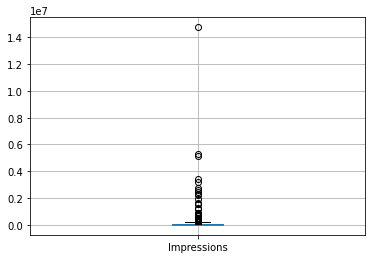

In [66]:
data_ad.boxplot(column = ["Impressions"])

### Clustering

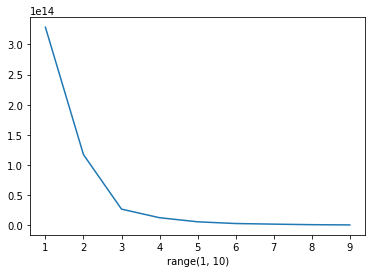

In [47]:
from sklearn.cluster import KMeans 

intertias = []
X = data_ad
ks = range(1, 10)

for k in ks: 
    km_elbow = KMeans(n_clusters = k, random_state = 5).fit(X)
    intertias.append(km_elbow.inertia_)

plt.plot(ks, intertias)
plt.xlabel(ks)
plt.show()

-> Use 3 Cluster!